<a href="https://colab.research.google.com/github/muradhani/pytorch/blob/main/ch1_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [3]:

#setup agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device}")

using device : cpu


In [5]:
#creating straight line dataset using linear regression
#create known parameters
weight = 0.3
bias = 0.9

start = 0 
end = 1 
step = 0.02
 
x = torch.arange(start , end ,step)
y = weight * x + bias 


In [6]:
#splitting data 
train_split = int(len(x)* 0.8)
x_train , y_train = x[:train_split] , y[:train_split]
x_test , y_test   = x[train_split:] , y[train_split:]
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [9]:
#visualize function of data 
import matplotlib.pyplot as plt

def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data , train_labels , c="b" , s=4 , label="training data")
  
  #plot test data in green 
  plt.scatter(test_data , test_labels,c="g",s=4,label="testing data")

  #are there predictions ?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  #show the legend
  plt.legend(prop={"size":14});

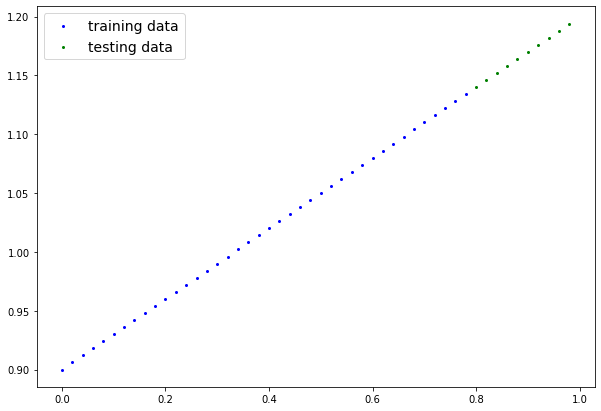

In [10]:
plot_predictions(x_train , y_train , x_test , y_test)

In [13]:
from torch import nn 

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True ,dtype=torch.float ))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True ,dtype=torch.float ))

  def forward(self,x:torch.Tensor )->torch.Tensor:
    return x * self.weight + self.bias

In [15]:
#checking the content of pytorch model 
#create a random seed
torch.manual_seed(42)
#create instance of the model 
model_0 = LinearRegressionModel()
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
#trainig loop 
#loss function
loss_fn = nn.L1Loss()

#optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)


In [18]:
#training loop 
epochs = 300 

for epoch in range(epochs):
  model_0.train()
  #1-forward
  y_pred = model_0(x_train)

  #2-calculate loss 
  loss = loss_fn(y_train , y_pred)
  print(f"loss {loss}")

  #3-optimizer zero grade 
  optimizer.zero_grad()
  #4-back propagation
  loss.backward()

  #5-optimize the parameters
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    #1-forward pass 
    test_pred = model_0(x_test)
    #2-calculate the loss
    test_loss = loss_fn(y_test , test_pred)

  #print out whats happening
  if epoch % 20 ==0:  
    print(f"Epoch: {epoch} | loss: {loss} | test loss : {test_loss}")
    #print out model state_dict()
    print(model_0.state_dict())

loss 0.7453603148460388
Epoch: 0 | loss: 0.7453603148460388 | test loss : 0.7115941643714905
OrderedDict([('weight', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss 0.7338393330574036
loss 0.7223183512687683
loss 0.7107973098754883
loss 0.699276328086853
loss 0.687755286693573
loss 0.676234245300293
loss 0.6647132635116577
loss 0.653192400932312
loss 0.6416712999343872
loss 0.630150318145752
loss 0.6186293363571167
loss 0.6071082949638367
loss 0.5955873727798462
loss 0.5840662717819214
loss 0.5725453495979309
loss 0.5610243082046509
loss 0.5495033860206604
loss 0.5379823446273804
loss 0.5264613628387451
loss 0.5149403810501099
Epoch: 20 | loss: 0.5149403810501099 | test loss : 0.44217434525489807
OrderedDict([('weight', tensor([0.4225])), ('bias', tensor([0.3488]))])
loss 0.5034194588661194
loss 0.49189844727516174
loss 0.4803773760795593
loss 0.46885648369789124
loss 0.4573354721069336
loss 0.44581446051597595
loss 0.4342934489250183
loss 0.4227725565433502
loss 0.411251485347747

In [19]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3094])), ('bias', tensor([0.9003]))])

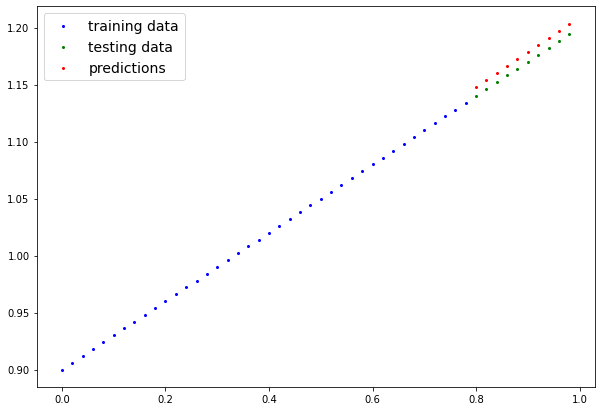

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

plot_predictions(predictions = y_preds_new)